<img src = "NYC TREE CENSUS.png"></img>

<h3> Data Explanation </h3>

**This dataset is taken from [NYC Open Data.](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh).**

> Street tree data from the TreesCount! 2015 Street Tree Census, conducted by volunteers and staff organized by NYC Parks & Recreation and partner organizations. Tree data collected includes tree species, diameter and perception of health. Accompanying blockface data is available indicating status of data collection and data release citywide.

**Data has 684K rows, 45 columns.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# set to see all of the columns
pd.set_option("display.max_columns", None)

In [2]:
# read the data
data = pd.read_csv("Data/2015_Street_Tree_Census_-_Tree_Data.csv")

# display the data
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

<div class="alert alert-block alert-info"> 
        📌 Get to know our features: 
    
1. tree_id = Unique identification number for each tree point.

2. block_id = Identifier linking each tree to the block in the blockface table/shapefile that it is mapped on.

3. created_at = The date tree points were collected in the census software.

4. tree_dbh = Diameter of the tree, measured at approximately 54" / 137cm
above the ground. Data was collected for both living and dead
trees; for stumps, use stump_diam
    
5. stump_diam = Diameter of stump measured through the center, rounded to the
nearest inch. Only applies when the **status** is stump.
    
6. curb_loc = Location of tree bed in relationship to the curb; trees are either
along the curb (OnCurb) or offset from the curb (OffsetFromCurb)
    
7. status = Indicates whether the tree is alive, standing dead, or a stump
    
8. health = Indicates the user's perception of tree health. Left blanks if the tree is stump or dead.
    
9. spc_latin = Scientific name for species, e.g. "Acer rubrum"
    
10. spc_common = Common name for species, e.g. "red maple"
    
11. steward = Indicates the number of unique signs of stewardship observed for
this tree. Not recorded for stumps or dead trees.
    
12. guards = Indicates whether a guard is present, and if the user felt it was a
helpful or harmful guard. Not recorded for dead trees and stumps.
    
13. sidewalk = Indicates whether one of the sidewalk flags immediately adjacent
to the tree was damaged, cracked, or lifted. Not recorded for dead
trees and stumps.
    
14. user_type = This field describes the category of user who collected this tree
point's data. (volunteer, treescount staff, NYC parks staff)
    
15. problems = ...
    
16. root_stone = Indicates the presence of a root problem caused by paving stones
in tree bed
    
17. root_grate = Indicates the presence of a root problem caused by metal grates in
tree bed
 
18. root_other = Indicates the presence of other root problems
    
19. trunk_wire = Indicates the presence of a trunk problem caused by wires or rope
wrapped around the trunk
 
20. trnk_light = Indicates the presence of a trunk problem caused by lighting
installed on the tree
    
21. trnk_other = Indicates the presence of other trunk problems
    
22. brch_light = Indicates the presence of a branch problem caused by lights
(usually string lights) or wires in the branches
    
23. brch_shoe = Indicates the presence of a branch problem caused by sneakers in
the branches
    
24. brch_other = Indicates the presence of other branch problems
  
25. adress = Nearest estimated address to tree
    
26. zipcode = Five-digit zipcode in which tree is located 
    
27. zip_city = City as derived from zipcode. This is often (but not always) the
same as borough.
    
28. community board = Community board in which tree point is located
    
29. borocode = Code for borough in which tree point is located
    
30. borough = Name of borough in which tree point is located
    
31. cncldist = Council district in which tree point is located
   
32. st_assem = State Assembly District in which tree point is located
    
33. st_senate = State Senate District in which tree point is located
    
34. nta = This is the NTA Code corresponding to the neighborhood
tabulation area from the 2010 US Census that the tree point falls
into.
    
35. nta_name = This is the NTA name corresponding to the neighborhood
tabulation area from the 2010 US Census that the tree point falls
into.
    
36. boro_ct = This is the boro_ct identifyer for the census tract that the tree point
falls into.
    
37. state = All features given value 'New York'
 
38. latitude = Latitude of point, in decimal degrees
    
39. longitude = Longitude of point, in decimal degrees
    
40. x_sp = X coordinate, in state plane. Units are feet.
    
41. y_sp = Y coordinate, in state plane. Units are feet.

42. council district = ...
    
43. census tract = ...
    
44. bin = ...
    
45. bbl = ...

</div>

⭐️ There too much column to work with. So, I'll create a subset of this data.

In [4]:
data_subset = data[['tree_id', "tree_dbh", "stump_diam", "curb_loc", "status", "health", 'spc_latin', 
                    'steward', 'sidewalk', 'user_type', 'problems', 'root_stone',
                    'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                    'brch_light', 'brch_shoe', 'brch_other', 'borough']]

In [5]:
data_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Queens
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,Queens
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Staten Island
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Bronx


In [6]:
# check for null values
data_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
user_type         0
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
borough           0
dtype: int64

📌`As we described above when we tried to understand data; health, steward, sidewalk features will be left blanks if tree is stump or dead. `

In [7]:
data_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


📌`Biggest stump diameter in cencus is 140.0 inch while the biggest tree diameter 450.0 inch.`

In [8]:
data_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
steward       object
sidewalk      object
user_type     object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
borough       object
dtype: object

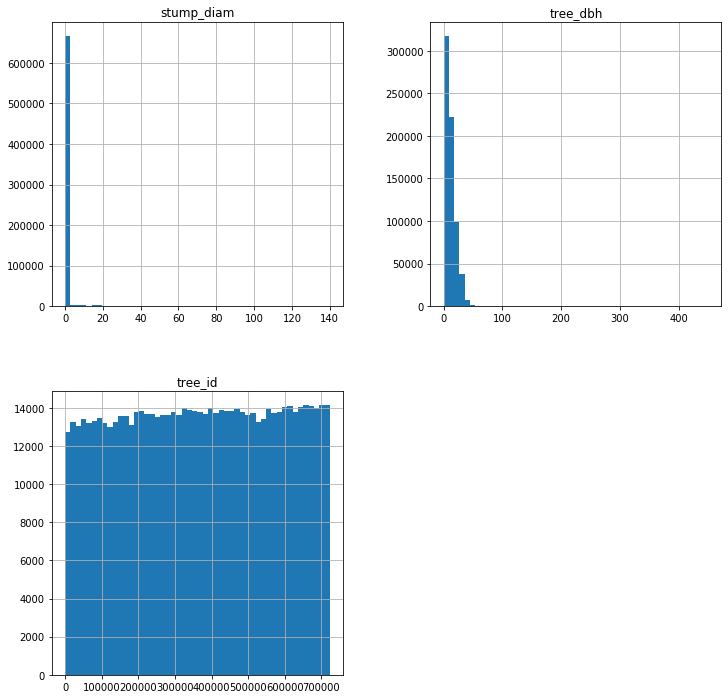

In [9]:
data_subset.hist(bins = 50, figsize = (12, 12));

⭐️`As you can see in first two plot most of the stamps' diameter is between 0, and 11 inches while most of the tree's diameter is between 0 and appro. 20 inches.`

📌 **In second graph we have very large x labels. I'd like to know how many trees are there with diameters bigger than 50 inches.**

In [10]:
big_trees = data_subset[data_subset["tree_dbh"] > 50]

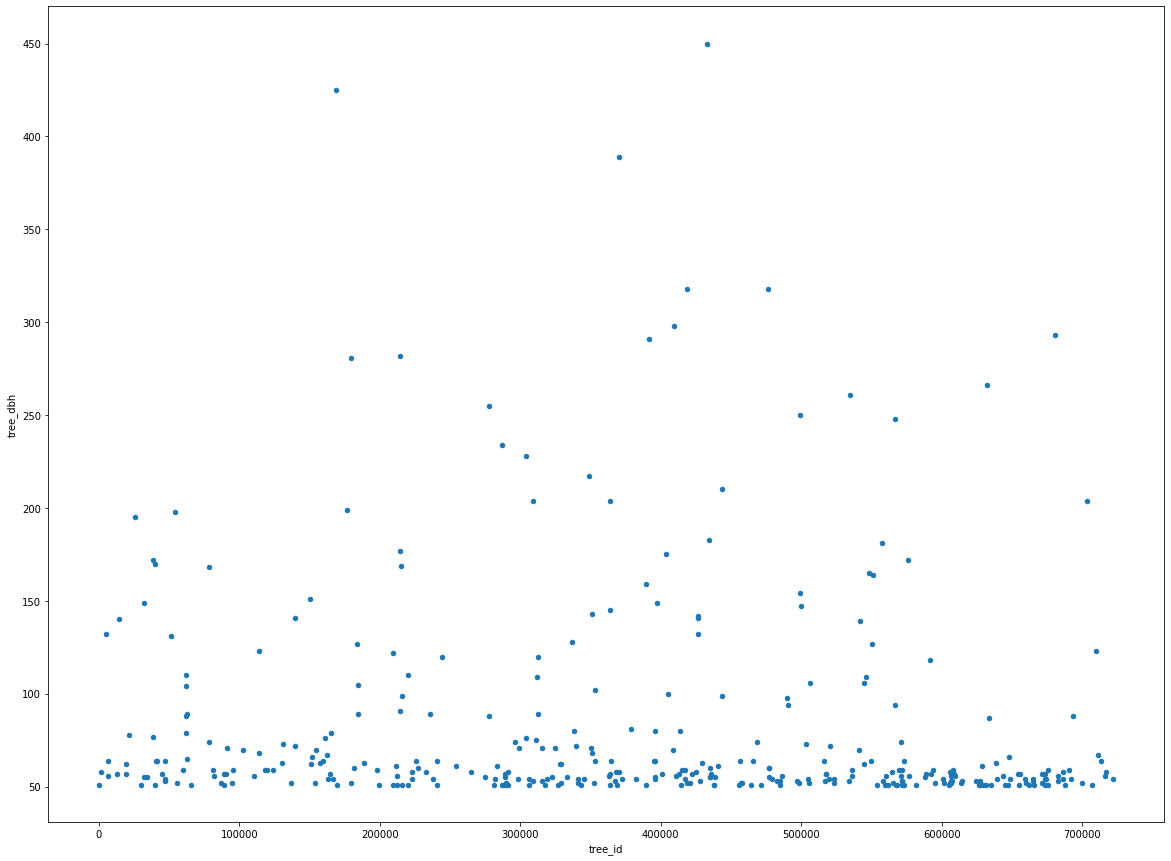

In [11]:
big_trees[["tree_id", "tree_dbh"]].plot(kind = 'scatter', x = "tree_id", y = "tree_dbh", figsize = (20, 15));

`🤔 450 inches = 1143 cm = 11.43 m. Data have more than one trees with diameter greater than 300 inches. It's a big number for a tree. Let's try the same with stumps.`

In [12]:
stumps = data_subset[data_subset["stump_diam"] > 50]

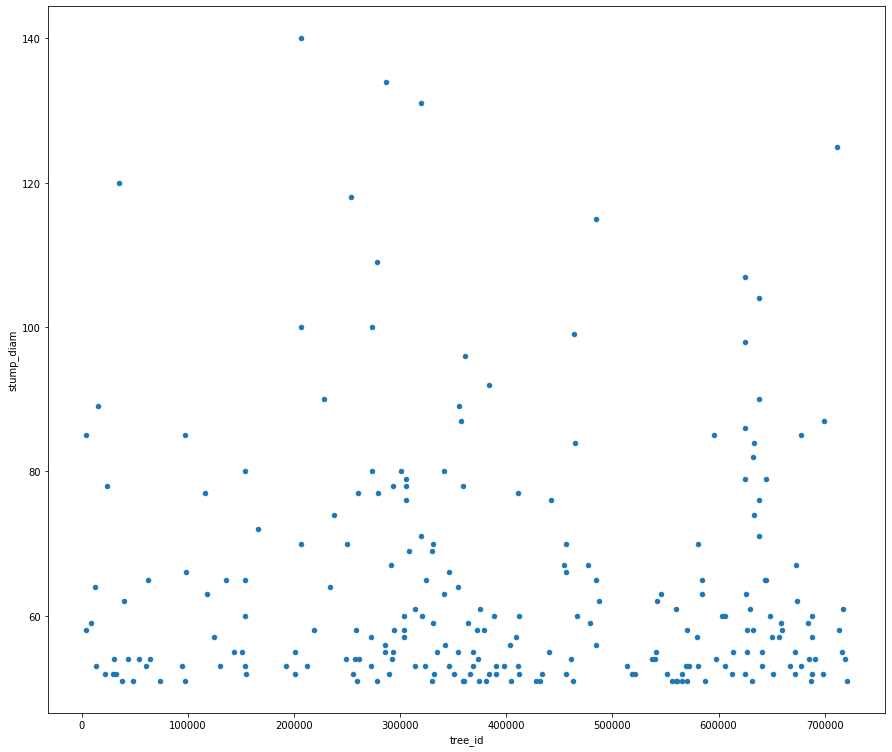

In [13]:
stumps[["tree_id", "stump_diam"]].plot(kind = "scatter", x = "tree_id", y = "stump_diam", figsize = (15, 13));

🧩`140 inches = 3.55600 m`

In [14]:
data_subset["health"].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

📌`We have 3 category.`

In [15]:
good_health = data_subset[data_subset['health'] == "Good"]

In [16]:
good_health

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
5,190422,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
6,190426,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683782,184210,3,0,OnCurb,Alive,Good,Quercus palustris,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Bronx
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Staten Island


📌`Since we know stump entries has 0 as a value because health left blank if tree is dead or stump. See it below:`

In [17]:
good_health["stump_diam"].value_counts()

0    528850
Name: stump_diam, dtype: int64

📌`Also status as alive since it left blank if tree is dead or stump.`

In [18]:
good_health["status"].value_counts()

Alive    528850
Name: status, dtype: int64

In [19]:
good_health.sort_values(by = "tree_dbh", ascending = False).head(20)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Brooklyn
201195,418433,318,0,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,NYC Parks Staff,BranchLights,No,No,No,No,No,No,Yes,No,No,Brooklyn
270493,476317,318,0,OnCurb,Alive,Good,Quercus palustris,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Manhattan
227057,409369,298,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,TreesCount Staff,BranchLights,No,No,No,No,No,No,Yes,No,No,Staten Island
457612,680498,293,0,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,NYC Parks Staff,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
29973,214534,282,0,OnCurb,Alive,Good,Platanus x acerifolia,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
439083,632254,266,0,OnCurb,Alive,Good,Tilia cordata,1or2,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
346438,535083,261,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Queens
83547,278078,255,0,OnCurb,Alive,Good,Platanus x acerifolia,None,Damage,NYC Parks Staff,"Stones,WiresRope,BranchLights",Yes,No,No,Yes,No,No,Yes,No,No,Staten Island
305789,498910,250,0,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Staten Island


📌`If you change head with tail you will see there are trees with 0 diameter. I don't even know if this is possible.`

In [20]:
good_health.sort_values(by = "tree_dbh", ascending = False).tail(5)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
206479,424002,0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Brooklyn
440932,618698,0,0,OnCurb,Alive,Good,Quercus acutissima,1or2,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Brooklyn
167029,347120,0,0,OnCurb,Alive,Good,Styphnolobium japonicum,1or2,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Brooklyn
272643,424440,0,0,OnCurb,Alive,Good,Juniperus virginiana,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Queens
185395,351113,0,0,OnCurb,Alive,Good,Picea abies,1or2,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Bronx


`Good and OffCurb trees:`

In [21]:
good_health[good_health["curb_loc"] == "OffsetFromCurb"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
41,208346,20,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
48,189339,18,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
97,189338,18,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
98,208240,2,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
117,209921,3,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683541,199063,4,0,OffsetFromCurb,Alive,Good,Malus,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Manhattan
683544,192670,13,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Manhattan
683560,184529,14,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Bronx
683585,189467,4,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn


📌`528850 - 20877 = 507973 = OnCurb. But we should check:`

In [22]:
good_health[good_health["curb_loc"] == "OnCurb"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
5,190422,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
6,190426,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683782,184210,3,0,OnCurb,Alive,Good,Quercus palustris,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Bronx
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Staten Island


🎉`Correct! But trees being offset from the curb is not healtier from the trees being on curb.`

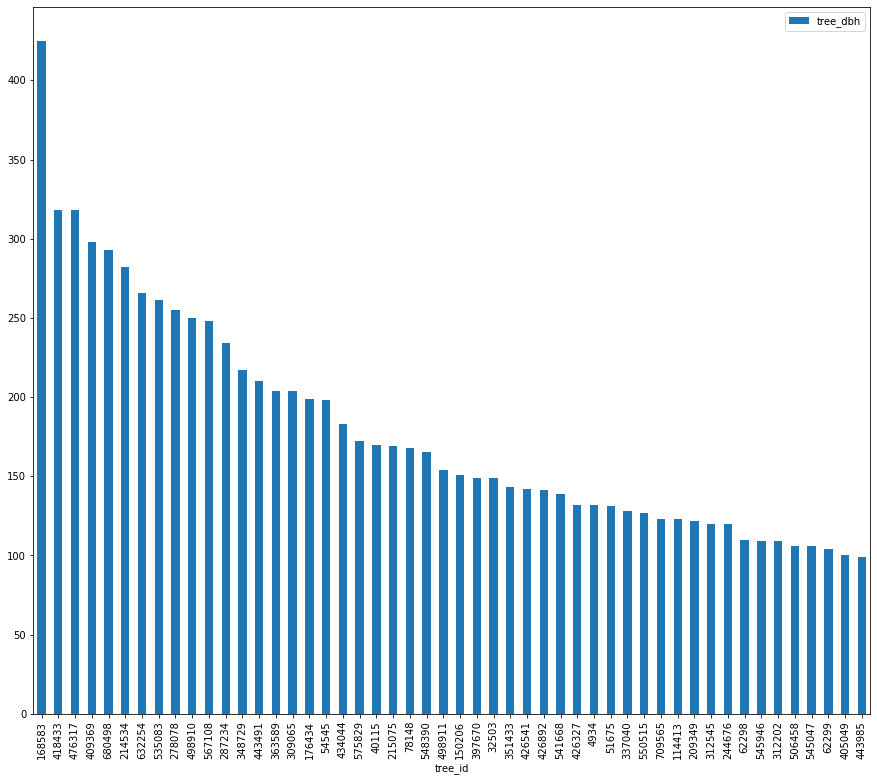

In [23]:
good_health.sort_values(by = "tree_dbh", ascending = False).head(50)[["tree_id" ,"tree_dbh"]].plot(kind = "bar", x = "tree_id", y = "tree_dbh", figsize = (15, 13));

📌`You can see the distribution more clear. Now, let's check steward features for good health trees.`

In [24]:
good_health.steward.value_counts()

None       396511
1or2       115372
3or4        15606
4orMore      1361
Name: steward, dtype: int64

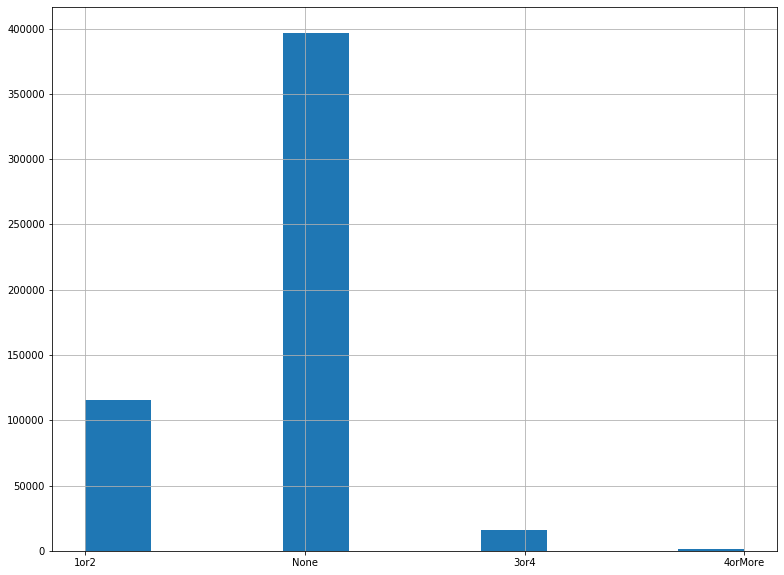

In [25]:
good_health["steward"].hist(figsize = (13, 10));

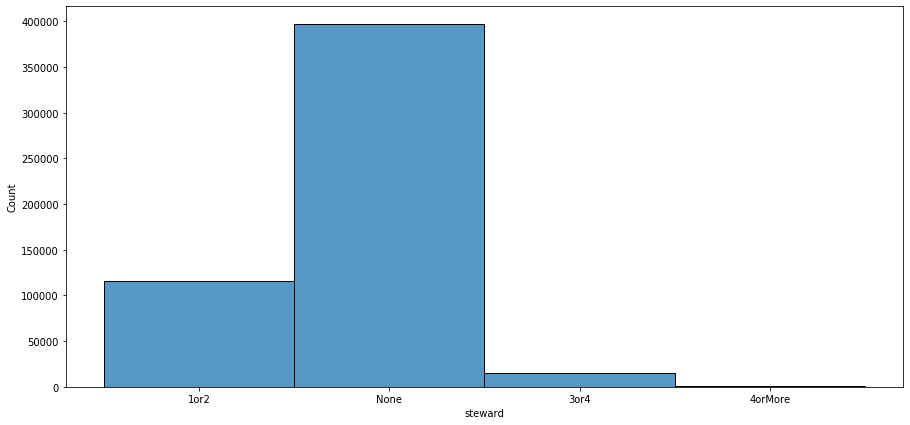

In [26]:
plt.figure(figsize = (15, 7))
sns.histplot(x = "steward", data = good_health);

📌`This looks much more nice than before. Trees without someone to take care of them is more healthier.`

In [27]:
data_subset.groupby("health")["health"].count()

health
Fair     96504
Good    528850
Poor     26818
Name: health, dtype: int64

In [28]:
data_subset.groupby(["health", "steward"]).count()

tree_id  tree_dbh  stump_diam  curb_loc  status  spc_latin  \
health steward                                                               
Fair   1or2       21902     21902       21902     21902   21902      21902   
       3or4        2830      2830        2830      2830    2830       2830   
       4orMore      200       200         200       200     200        200   
       None       71572     71572       71572     71572   71572      71572   
Good   1or2      115372    115372      115372    115372  115372     115369   
       3or4       15606     15606       15606     15606   15606      15606   
       4orMore     1361      1361        1361      1361    1361       1361   
       None      396511    396511      396511    396511  396511     396510   
Poor   1or2        6283      6283        6283      6283    6283       6283   
       3or4         747       747         747       747     747        747   
       4orMore       49        49          49        49      49         49   
       None       19739     19739       19739     19739   19739      19738   

                sidewalk  user_type  problems  root_stone  root_grate  \
health steward                                                          
Fair   1or2        21902      21902     21898       21902       21902   
       3or4         2830       2830      2830        2830        2830   
       4orMore       200        200       200         200         200   
       None        71572      71572     71569       71572       71572   
Good   1or2       115372     115372    115352      115372      115372   
       3or4        15606      15606     15605       15606       15606   
       4orMore      1361       1361      1361        1361        1361   
       None       396510     396511    396492      396511      396511   
Poor   1or2         6283       6283      6282        6283        6283   
       3or4          747        747       747         747         747   
       4orMore        49         49        49          49          49   
       None        19739      19739     19738       19739       19739   

                root_other  trunk_wire  trnk_light  trnk_other  brch_light  \
health steward                                                               
Fair   1or2          21902       21902       21902       21902       21902   
       3or4           2830        2830        2830        2830        2830   
       4orMore         200         200         200         200         200   
       None          71572       71572       71572       71572       71572   
Good   1or2         115372      115372      115372      115372      115372   
       3or4          15606       15606       15606       15606       15606   
       4orMore        1361        1361        1361        1361        1361   
       None         396511      396511      396511      396511      396511   
Poor   1or2           6283        6283        6283        6283        6283   
       3or4            747         747         747         747         747   
       4orMore          49          49          49          49          49   
       None          19739       19739       19739       19739       19739   

                brch_shoe  brch_other  borough  
health steward                                  
Fair   1or2         21902       21902    21902  
       3or4          2830        2830     2830  
       4orMore        200         200      200  
       None         71572       71572    71572  
Good   1or2        115372      115372   115372  
       3or4         15606       15606    15606  
       4orMore       1361        1361     1361  
       None        396511      396511   396511  
Poor   1or2          6283        6283     6283  
       3or4           747         747      747  
       4orMore         49          49       49  
       None         19739       19739    19739

📌`Most of the poor health trees does not have someone to take of them. Same as fair health trees.`

In [29]:
data_subset[data_subset["health"] == "Poor"].sort_values(by = "tree_dbh", ascending = False).head(5)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
538926,25993,195,0,OnCurb,Alive,Poor,Platanus x acerifolia,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,Brooklyn
223493,403744,175,0,OnCurb,Alive,Poor,Acer platanoides,None,NoDamage,Volunteer,"Stones,TrunkOther,BranchOther",Yes,No,No,No,No,Yes,No,No,Yes,Brooklyn
294209,500075,147,0,OnCurb,Alive,Poor,Pyrus calleryana,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Staten Island
40877,220376,110,0,OnCurb,Alive,Poor,Acer platanoides,None,Damage,Volunteer,"Stones,RootOther,BranchLights,BranchOther",Yes,No,Yes,No,No,No,Yes,No,Yes,Queens
29669,215564,99,0,OnCurb,Alive,Poor,Juniperus virginiana,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Bronx


`Trees with poor health has more smaller diameters than trees with good health.`

In [30]:
data_subset[data_subset["health"] == "Fair"].sort_values(by = "tree_dbh", ascending = False).head(5)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
180962,370606,389,0,OnCurb,Alive,Fair,Liriodendron tulipifera,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Queens
187388,391542,291,0,OnCurb,Alive,Fair,Prunus,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Bronx
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Queens
100308,304388,228,0,OnCurb,Alive,Fair,Pyrus calleryana,None,NoDamage,NYC Parks Staff,BranchOther,No,No,No,No,No,No,No,No,Yes,Manhattan
336603,557343,181,0,OnCurb,Alive,Fair,Quercus palustris,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,Queens


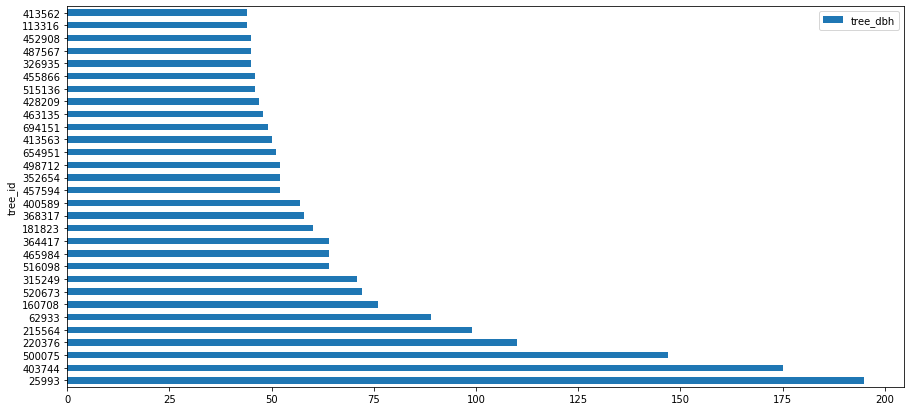

In [31]:
data_subset[data_subset["health"] == "Poor"].sort_values(by = "tree_dbh", ascending = False).head(30)[["tree_id", "tree_dbh"]].plot(kind = "barh", x = "tree_id", y = "tree_dbh", figsize = (15, 7));

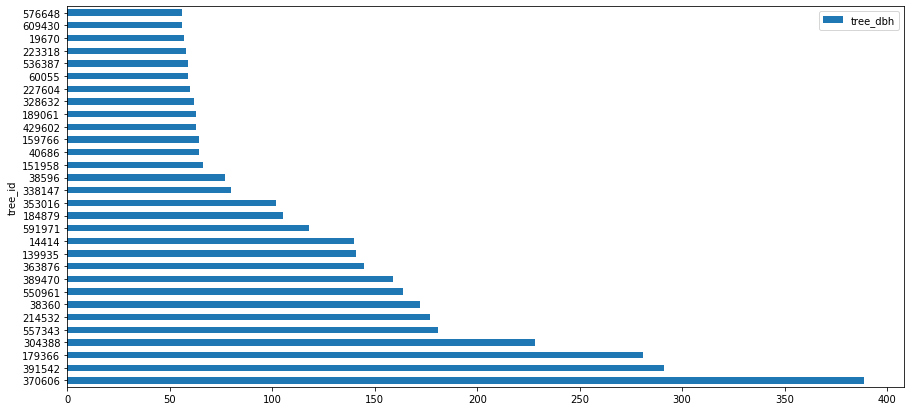

In [32]:
data_subset[data_subset["health"] == "Fair"].sort_values(by = "tree_dbh", ascending = False).head(30)[["tree_id", "tree_dbh"]].plot(kind = "barh", x = "tree_id", y = "tree_dbh", figsize = (15, 7));

In [33]:
data_subset[data_subset["health"] == "Poor"].groupby("curb_loc").count()

,tree_id,tree_dbh,stump_diam,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
curb_loc,,,,,,,,,,,,,,,,,,,,
OffsetFromCurb,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963
OnCurb,25855,25855,25855,25855,25855,25854,25855,25855,25855,25853,25855,25855,25855,25855,25855,25855,25855,25855,25855,25855


📌`Trees on curb most likely to be poor.`

📌`Speecies with most trees.`

In [34]:
latin_names = pd.DataFrame(data_subset.groupby("spc_latin")["tree_id"].count().sort_values(ascending = False)).reset_index().head(10)
latin_names.head(20)

,spc_latin,tree_id
0,Platanus x acerifolia,87014
1,Gleditsia triacanthos var. inermis,64264
2,Pyrus calleryana,58931
3,Quercus palustris,53185
4,Acer platanoides,34189
5,Tilia cordata,29742
6,Prunus,29279
7,Zelkova serrata,29258
8,Ginkgo biloba,21024
9,Styphnolobium japonicum,19338


![image](https://www.konusanagac.com/files/img/agac-8a85.jpeg)
> Platanus x acerifolia

📌`Platanus x acerifolia speecies is in majority in NY streets.`

In [35]:
data_subset.groupby("spc_latin").count().sort_values(by = "tree_id", ascending = False)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
spc_latin,,,,,,,,,,,,,,,,,,,,
Platanus x acerifolia,87014,87014,87014,87014,87014,87014,87014,87014,87014,87012,87014,87014,87014,87014,87014,87014,87014,87014,87014,87014
Gleditsia triacanthos var. inermis,64264,64264,64264,64264,64264,64263,64263,64262,64264,64259,64264,64264,64264,64264,64264,64264,64264,64264,64264,64264
Pyrus calleryana,58931,58931,58931,58931,58931,58931,58931,58931,58931,58924,58931,58931,58931,58931,58931,58931,58931,58931,58931,58931
Quercus palustris,53185,53185,53185,53185,53185,53185,53185,53185,53185,53179,53185,53185,53185,53185,53185,53185,53185,53185,53185,53185
Acer platanoides,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189,34189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pinus nigra,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Pinus rigida,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Maclura pomifera,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


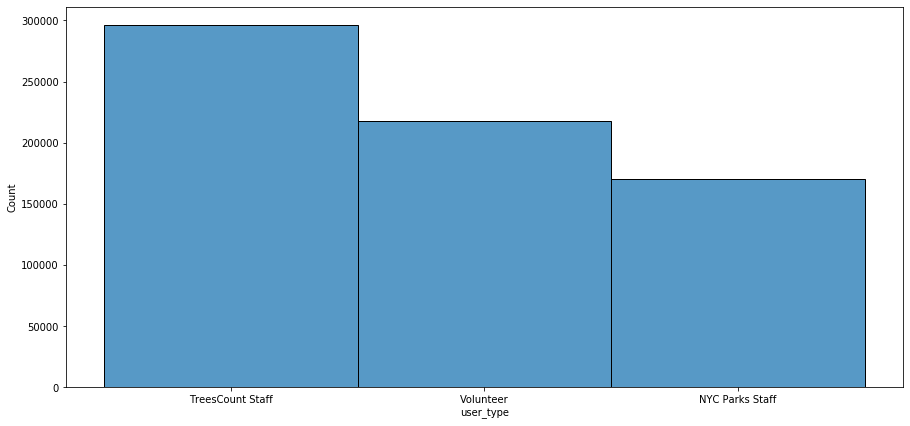

In [36]:
plt.figure(figsize = (15, 7))
sns.histplot(x = "user_type", data = data_subset);

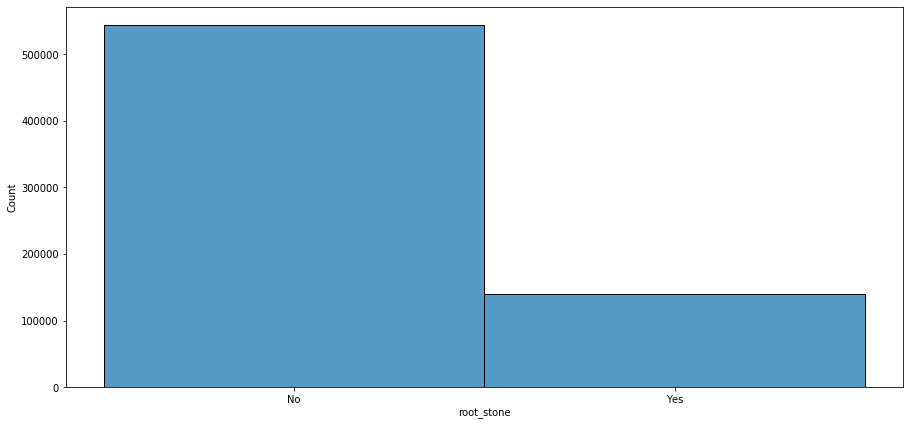

In [37]:
plt.figure(figsize = (15, 7))
sns.histplot(x = "root_stone", data = data_subset);

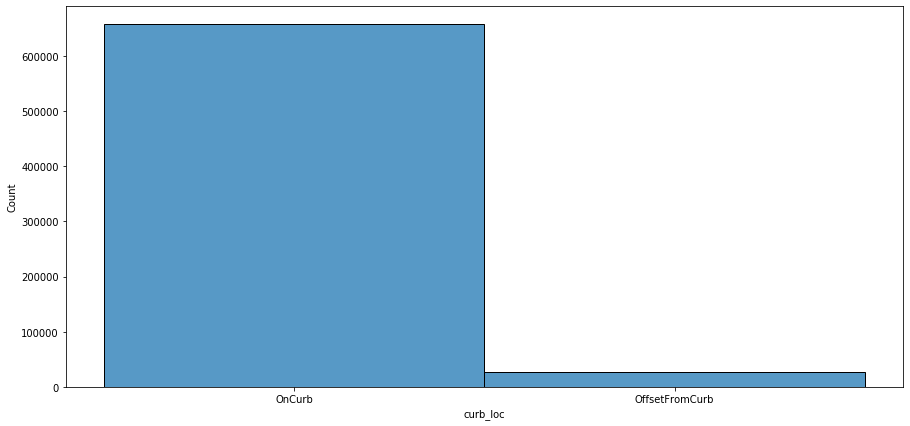

In [38]:
plt.figure(figsize = (15, 7))
sns.histplot(x = "curb_loc", data = data_subset);

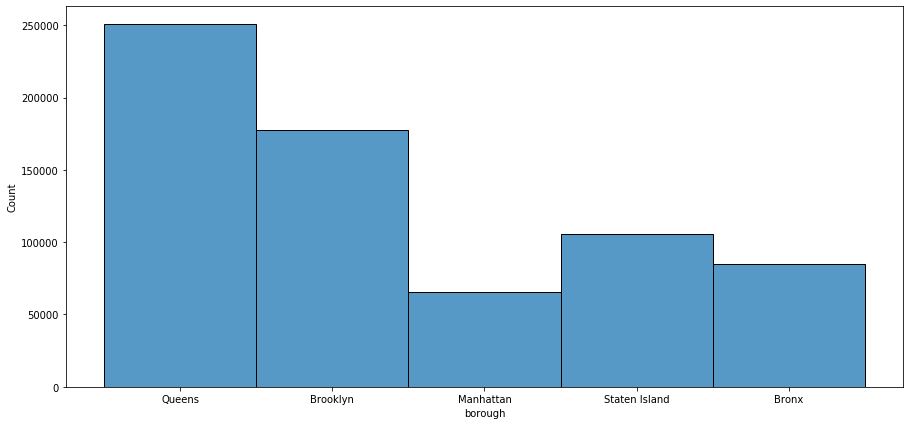

In [39]:
plt.figure(figsize = (15, 7))
sns.histplot(x = "borough", data = data_subset);

## Data Cleaning

As you can remember some columns contains nan values according to their health. Health values are blank when the tree's status is stump or dead. We should check it first.

In [40]:
data_subset["health"].isna().sum()

31616

In [41]:
data_subset["health"][data_subset["status"] == "Stump"].isna().sum()

17654

In [42]:
data_subset["health"][data_subset["status"] == "Stump"]

37        NaN
239       NaN
641       NaN
644       NaN
646       NaN
         ... 
683348    NaN
683686    NaN
683695    NaN
683697    NaN
683699    NaN
Name: health, Length: 17654, dtype: object

📌 `See? Health entries of trees with stump status are all NaN. Let's try with dead statu.`

In [43]:
data_subset["health"][data_subset["status"] == "Dead"]

57        NaN
196       NaN
209       NaN
266       NaN
285       NaN
         ... 
682816    NaN
682823    NaN
683346    NaN
683693    NaN
683698    NaN
Name: health, Length: 13961, dtype: object

In [44]:
data_subset["health"][data_subset["status"] == "Dead"].isna().sum()

13961

📌`Same problem here. We can fill them with something else. Like 'Unknown'. But I think we should check for other NaN values. What other values can be null because it is stump or dead?`

In [45]:
data_subset[data_subset["status"] == "Stump"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,Queens
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,Staten Island


In [46]:
data_subset[data_subset["status"] == "Stump"].groupby("status")[["spc_latin", "steward", "sidewalk", "problems"]].count()

,spc_latin,steward,sidewalk,problems
status,,,,
Stump,0,0,0,0


In [47]:
data_subset[data_subset["status"] == "Dead"].groupby("status")[["spc_latin", "steward", "sidewalk", "problems"]].count()

,spc_latin,steward,sidewalk,problems
status,,,,
Dead,1,0,0,0


In [48]:
data_subset[data_subset["status"] == "Dead"]["spc_latin"].value_counts()

Gleditsia triacanthos var. inermis    1
Name: spc_latin, dtype: int64

📌 `1 entry is not important we're only going to fill NaN values.`

📌`We grouped entries with status equals to stump, and four features has no value inside them.`

In [49]:
data_subset[data_subset["status"] == "Stump"]["spc_latin"].isna().sum()

17654

📌 `We should fill them then.`

In [50]:
fill = ((data_subset["status"] == "Stump") | (data_subset["status"] == "Dead"))

In [51]:
data_subset.loc[fill] = data_subset.loc[fill].fillna("Unknown")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
data_subset[data_subset["status"] == "Stump"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
37,211205,0,16,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,TreesCount Staff,Unknown,No,No,No,No,No,No,No,No,No,Queens
239,203597,0,15,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,Volunteer,Unknown,No,No,No,No,No,No,No,No,No,Queens
641,179766,0,30,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,TreesCount Staff,Unknown,No,No,No,No,No,No,No,No,No,Brooklyn
644,180619,0,10,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,TreesCount Staff,Unknown,No,No,No,No,No,No,No,No,No,Queens
646,208828,0,15,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,Volunteer,Unknown,No,No,No,No,No,No,No,No,No,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,Volunteer,Unknown,No,No,No,No,No,No,No,No,No,Brooklyn
683686,191219,0,25,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,NYC Parks Staff,Unknown,No,No,No,No,No,No,No,No,No,Queens
683695,170888,0,5,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,TreesCount Staff,Unknown,No,No,No,No,No,No,No,No,No,Brooklyn
683697,177922,0,17,OnCurb,Stump,Unknown,Unknown,Unknown,Unknown,Volunteer,Unknown,No,No,No,No,No,No,No,No,No,Staten Island


In [53]:
data_subset[data_subset["status"] == "Stump"].groupby("status")[["spc_latin", "steward", "sidewalk", "problems"]].count()

,spc_latin,steward,sidewalk,problems
status,,,,
Stump,17654,17654,17654,17654


In [54]:
data_subset[data_subset["status"] == "Stump"].isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
user_type     0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borough       0
dtype: int64

In [55]:
data_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
user_type      0
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
borough        0
dtype: int64

In [56]:
data_subset[data_subset["health"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Staten Island


In [57]:
data_subset[data_subset["sidewalk"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NaN,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Brooklyn


In [58]:
data_subset[data_subset["problems"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
133812,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
134820,332694,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Queens
144137,332947,3,0,OnCurb,Alive,Good,Ginkgo biloba,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
145324,332543,9,0,OnCurb,Alive,Good,Prunus,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
145337,332541,8,0,OnCurb,Alive,Good,Prunus,1or2,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn
146314,332542,8,0,OnCurb,Alive,Good,Prunus,1or2,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,Brooklyn


In [59]:
data_subset["problems"].value_counts()

None                                                                    426280
Stones                                                                   95673
Unknown                                                                  31615
BranchLights                                                             29452
Stones,BranchLights                                                      17808
                                                                         ...  
RootOther,WiresRope,Sneakers,BranchOther                                     1
Stones,RootOther,TrunkLights,BranchLights,BranchOther                        1
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther         1
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                   1
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights               1
Name: problems, Length: 233, dtype: int64

In [60]:
data_subset["health"].value_counts()

Good       528850
Fair        96504
Unknown     31615
Poor        26818
Name: health, dtype: int64

In [61]:
data_subset["sidewalk"].value_counts()

NoDamage    464978
Damage      187194
Unknown      31615
Name: sidewalk, dtype: int64

📌 `Filling null values with the majorities.`

In [62]:
data_subset["health"].fillna("Good", inplace = True)
data_subset["spc_latin"].fillna("No Observation", inplace = True)
data_subset["problems"].fillna("None", inplace = True)
data_subset["sidewalk"].fillna("NoDamage", inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
data_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
user_type     0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borough       0
dtype: int64

📌`Great! Seems like we cleaned our data. We haven't checked the trees with status alive maybe we should do that.`

In [77]:
data_subset[data_subset["status"] == "Alive"].describe()

,tree_id,tree_dbh,stump_diam
count,652173.000000,652173.000000,652173.0
mean,365689.637480,11.709485,0.0
std,208194.926983,8.634239,0.0
min,3.000000,0.000000,0.0
25%,186886.000000,5.000000,0.0
50%,367204.000000,10.000000,0.0
75%,546632.000000,16.000000,0.0
max,722694.000000,425.000000,0.0


📌`You see the min value of tree_dbh. It's zero. As we know alive trees has diameter entries so min value seems odd.`

In [79]:
alive_trees = data_subset[data_subset["status"] == "Alive"]
alive_trees[alive_trees["tree_dbh"] == 0]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough
5312,38793,0,0,OnCurb,Alive,Good,Cotinus coggygria,3or4,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
30524,204988,0,0,OnCurb,Alive,Good,Quercus phellos,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
44772,241329,0,0,OffsetFromCurb,Alive,Good,Malus,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
47154,173248,0,0,OnCurb,Alive,Good,Quercus bicolor,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Brooklyn
47484,204173,0,0,OnCurb,Alive,Poor,Picea abies,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,Staten Island
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658977,162280,0,0,OnCurb,Alive,Poor,Quercus bicolor,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,Staten Island
671073,17796,0,0,OnCurb,Alive,Fair,Taxodium distichum,1or2,NoDamage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,Manhattan
671971,120612,0,0,OnCurb,Alive,Good,Juniperus virginiana,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Queens
672443,116239,0,0,OnCurb,Alive,Good,Acer palmatum,1or2,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,Bronx


📌`Actually, I don't know what to do with this. We can change only those values with median maybe. But I won't do anything.`

`So, that's all I have for this notebook. I hope you like it! 🚀`